In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from matplotlib_venn import venn2


In [2]:
def file_reading(file_path):
    dependencies = set()
    with open(file_path, 'r') as file:
        for line in file:
            # Splitting each line based on "->"
            parts = line.split("->")
            if len(parts) == 2:
                # Extracting dependencies from each part and adding curly brackets
                dependency1 = "{" + parts[0].strip().strip('"{}') + "}"
                dependency2 = "{" + parts[1].strip().strip('"{}') + "}"
                dependencies.add(dependency1 + " -> " + dependency2)
    return dependencies

In [3]:
real_dependency_list = file_reading('airbnb_FD_data.csv_logicDepTool.log')

In [4]:
len(real_dependency_list)

32

In [5]:
ctgan_dependency_list = file_reading('airbnb_ctgan_FD_data.csv_logicDepTool.log')

In [6]:
len(ctgan_dependency_list)

0

In [7]:
ctabgan_dependency_list = file_reading('airbnb_ctabgan_FD_data.csv_logicDepTool.log')

In [8]:
len(ctabgan_dependency_list)

1034

In [9]:
ctabgan_plus_dependency_list = file_reading('airbnb_ctabgan_plus_FD_data.csv_logicDepTool.log')

In [10]:
len(ctabgan_plus_dependency_list)

4

In [11]:
tvae_dependency_list = file_reading('airbnb_tvae_FD_data.csv_logicDepTool.log')

In [12]:
len(tvae_dependency_list)

7

In [13]:
nextconvgen_dependency_list = file_reading('airbnb_nextconvgen_FD_data.csv_logicDepTool.log')

In [14]:
len(nextconvgen_dependency_list)

32

In [15]:
tabddpm_dependency_list = file_reading('airbnb_tabddpm_FD_data.csv_logicDepTool.log')

In [16]:
len(tabddpm_dependency_list)

104

In [17]:
tabula_dependency_list = file_reading('airbnb_tabula_FD_data.csv_logicDepTool.log')

In [18]:
len(tabula_dependency_list)

13

In [19]:
custom_palette = {
    0: (70/255, 114/255, 232/255),   # GoogleBlue
    1: (76/255, 150/255, 77/255),     # GoogleGreen
    2: (238/255, 179/255, 62/255)     # GoogleOrange
}


In [20]:
def FD_venn_diagram(real_dependency_list, synthetic_dependency_list):
    def f(x):
        l = list(set(x))
        l.sort()
        return tuple(l)
    
    real_set = set(tuple(map(f, dependency)) for dependency in real_dependency_list)
    synthetic_set = set(tuple(map(f, dependency)) for dependency in synthetic_dependency_list)

    common_count = len(real_set.intersection(synthetic_set))

    # Calculate the total number of unique elements for each set
    real_elements = len(real_set)
    synthetic_elements = len(synthetic_set)

    # Normalize circle sizes based on the maximum number of unique elements
    max_elements = max(real_elements, synthetic_elements)

    venn2(subsets=(len(real_set) - common_count, len(synthetic_set) - common_count, common_count),normalize_to=1.0,
          set_labels=('Real', 'Synthetic'))

    # Add a title
    #plt.title("TabuLa")
    #plt.savefig('nextconvgen_FD.png', dpi=300, bbox_inches='tight')
    # Show the plot
    plt.show()

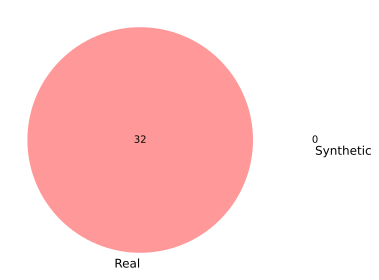

In [21]:
FD_venn_diagram(real_dependency_list, ctgan_dependency_list)

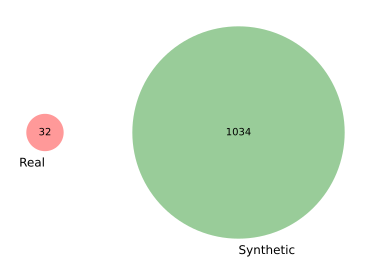

In [22]:
FD_venn_diagram(real_dependency_list, ctabgan_dependency_list)

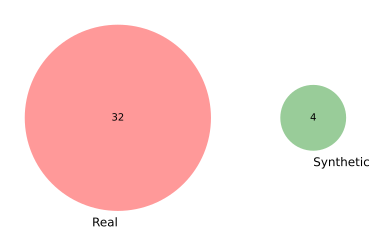

In [23]:
FD_venn_diagram(real_dependency_list, ctabgan_plus_dependency_list)

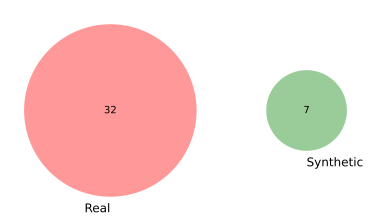

In [24]:
FD_venn_diagram(real_dependency_list, tvae_dependency_list)

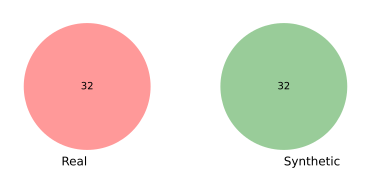

In [25]:
FD_venn_diagram(real_dependency_list, nextconvgen_dependency_list)

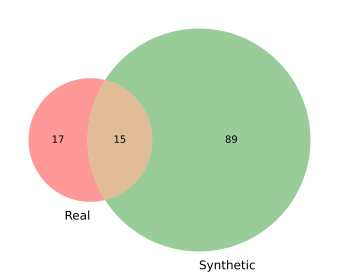

In [26]:
FD_venn_diagram(real_dependency_list, tabddpm_dependency_list)

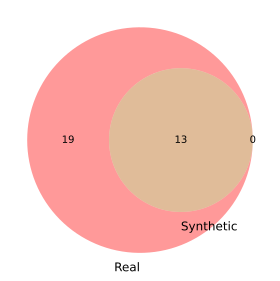

In [27]:
FD_venn_diagram(real_dependency_list, tabula_dependency_list)